## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.75


In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.9381 - acc: 0.3064 - val_loss: 1.8128 - val_acc: 0.3454
Epoch 2/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.7435 - acc: 0.3820 - val_loss: 1.7227 - val_acc: 0.3762
Epoch 3/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.6617 - acc: 0.4109 - val_loss: 1.6602 - val_acc: 0.4109
Epoch 4/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.6043 - acc: 0.4338 - val_loss: 1.5966 - val_acc: 0.4372
Epoch 5/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.5590 - acc: 0.4491 - val_loss: 1.6388 - val_acc: 0.4275
Epoch 6/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.5157 - acc: 0.4643 - val_loss: 1.5399 - val_acc: 0.4525
Epoch 7/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.4870 - acc: 0.4743 - val_loss: 1.6203 - val_ac

Epoch 2/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.9965 - acc: 0.2952 - val_loss: 1.9454 - val_acc: 0.3059
Epoch 3/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.9136 - acc: 0.3250 - val_loss: 1.8870 - val_acc: 0.3341
Epoch 4/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.8661 - acc: 0.3413 - val_loss: 1.8533 - val_acc: 0.3414
Epoch 5/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.8322 - acc: 0.3551 - val_loss: 1.8281 - val_acc: 0.3546
Epoch 6/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.8049 - acc: 0.3652 - val_loss: 1.7920 - val_acc: 0.3655
Epoch 7/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.7811 - acc: 0.3759 - val_loss: 1.7715 - val_acc: 0.3788
Epoch 8/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.7599 - acc: 0.3827 - val_loss: 1.7492 - val_acc: 0.3881
Epoch 9/50
50000/50000 [===========

50000/50000 [==============================] - 7s 137us/step - loss: 2.2314 - acc: 0.2001 - val_loss: 2.2176 - val_acc: 0.2179
Epoch 4/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.2047 - acc: 0.2247 - val_loss: 2.1920 - val_acc: 0.2349
Epoch 5/50
50000/50000 [==============================] - 7s 136us/step - loss: 2.1801 - acc: 0.2420 - val_loss: 2.1689 - val_acc: 0.2482
Epoch 6/50
50000/50000 [==============================] - 7s 136us/step - loss: 2.1576 - acc: 0.2516 - val_loss: 2.1476 - val_acc: 0.2571
Epoch 7/50
50000/50000 [==============================] - 7s 136us/step - loss: 2.1367 - acc: 0.2604 - val_loss: 2.1280 - val_acc: 0.2663
Epoch 8/50
50000/50000 [==============================] - 7s 136us/step - loss: 2.1172 - acc: 0.2688 - val_loss: 2.1097 - val_acc: 0.2720
Epoch 9/50
50000/50000 [==============================] - 6s 130us/step - loss: 2.0992 - acc: 0.2737 - val_loss: 2.0928 - val_acc: 0.2764
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 7s 135us/step - loss: 2.3282 - acc: 0.1193 - val_loss: 2.3235 - val_acc: 0.1240
Epoch 5/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.3176 - acc: 0.1238 - val_loss: 2.3139 - val_acc: 0.1270
Epoch 6/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.3090 - acc: 0.1277 - val_loss: 2.3058 - val_acc: 0.1297
Epoch 7/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.3016 - acc: 0.1316 - val_loss: 2.2990 - val_acc: 0.1336
Epoch 8/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.2953 - acc: 0.1355 - val_loss: 2.2930 - val_acc: 0.1378
Epoch 9/50
50000/50000 [==============================] - 7s 138us/step - loss: 2.2897 - acc: 0.1401 - val_loss: 2.2876 - val_acc: 0.1412
Epoch 10/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.2847 - acc: 0.1446 - val_loss: 2.2828 - val_acc: 0.1484
Epoch 11/50
50000/50000 [===================

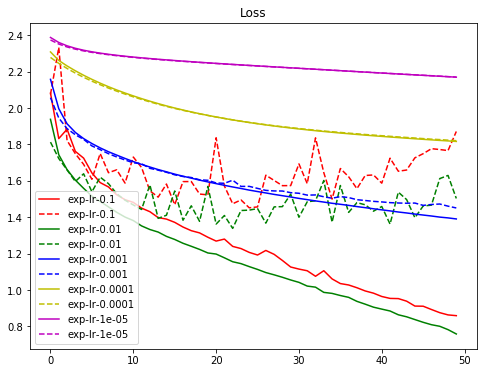

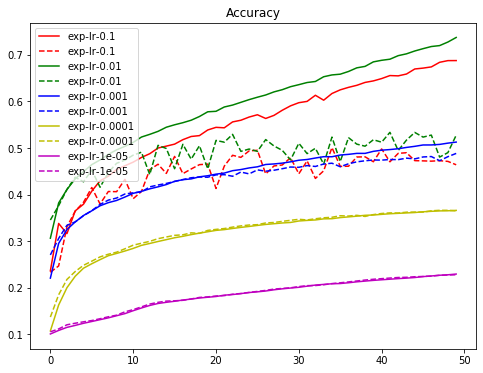

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [11]:
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.8660 - acc: 0.3264 - val_loss: 1.6971 - val_acc: 0.3953
Epoch 2/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.6738 - acc: 0.4018 - val_loss: 1.6471 - val_acc: 0.4111
Epoch 3/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.6003 - acc: 0.4292 - val_loss: 1.5541 - val_acc: 0.4498
Epoch 4/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5379 - acc: 0.4498 - val_loss: 1.5208 - val_acc: 0.4575
Epoch 5/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.4868 - acc: 0.4694 - val_loss: 1.5336 - val_acc: 0.4585
Epoch 6/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.4504 - acc: 0.4820 - val_loss: 1.4817 - val_acc: 0.4795
Epoch 7/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.4115 - acc: 0.4979 - val_loss: 1.4290 - val_acc

50000/50000 [==============================] - 4s 85us/step - loss: 1.8227 - acc: 0.3581 - val_loss: 1.7765 - val_acc: 0.3766
Epoch 3/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.7469 - acc: 0.3845 - val_loss: 1.7171 - val_acc: 0.3961
Epoch 4/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.6802 - acc: 0.4106 - val_loss: 1.6470 - val_acc: 0.4236
Epoch 5/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.6295 - acc: 0.4286 - val_loss: 1.6042 - val_acc: 0.4324
Epoch 6/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.5950 - acc: 0.4395 - val_loss: 1.5855 - val_acc: 0.4403
Epoch 7/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.5596 - acc: 0.4514 - val_loss: 1.5518 - val_acc: 0.4527
Epoch 8/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.5279 - acc: 0.4614 - val_loss: 1.5267 - val_acc: 0.4592
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 3s 55us/step - loss: 2.0341 - acc: 0.2787 - val_loss: 2.0097 - val_acc: 0.2839
Epoch 4/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.9853 - acc: 0.3007 - val_loss: 1.9678 - val_acc: 0.3059
Epoch 5/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.9482 - acc: 0.3171 - val_loss: 1.9331 - val_acc: 0.3213
Epoch 6/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.9170 - acc: 0.3324 - val_loss: 1.9046 - val_acc: 0.3322
Epoch 7/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.8916 - acc: 0.3400 - val_loss: 1.8818 - val_acc: 0.3394
Epoch 8/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.8697 - acc: 0.3499 - val_loss: 1.8615 - val_acc: 0.3500
Epoch 9/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.8509 - acc: 0.3565 - val_loss: 1.8448 - val_acc: 0.3568
Epoch 10/50
50000/50000 [========================

50000/50000 [==============================] - 7s 132us/step - loss: 2.2381 - acc: 0.1907 - val_loss: 2.2314 - val_acc: 0.1960
Epoch 5/50
50000/50000 [==============================] - 6s 127us/step - loss: 2.2219 - acc: 0.1994 - val_loss: 2.2159 - val_acc: 0.2056
Epoch 6/50
50000/50000 [==============================] - 3s 58us/step - loss: 2.2067 - acc: 0.2076 - val_loss: 2.2012 - val_acc: 0.2133
Epoch 7/50
50000/50000 [==============================] - 6s 127us/step - loss: 2.1921 - acc: 0.2163 - val_loss: 2.1872 - val_acc: 0.2192
Epoch 8/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.1783 - acc: 0.2247 - val_loss: 2.1741 - val_acc: 0.2233
Epoch 9/50
50000/50000 [==============================] - 4s 73us/step - loss: 2.1655 - acc: 0.2313 - val_loss: 2.1620 - val_acc: 0.2341
Epoch 10/50
50000/50000 [==============================] - 3s 57us/step - loss: 2.1536 - acc: 0.2384 - val_loss: 2.1506 - val_acc: 0.2401
Epoch 11/50
50000/50000 [======================

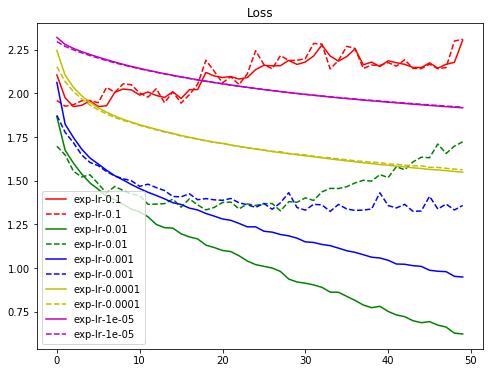

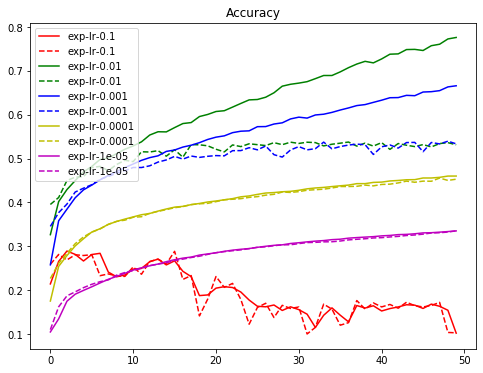

In [12]:
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()